## Import Python modules

In [1]:
# Import necessary libraries
import numpy as np
import pandas as pd
import seaborn as sns
import scipy.stats as stats
import matplotlib.pyplot as plt
from itertools import cycle

# Plot figures inline
import matplotlib as mpl
mpl.rcParams['pdf.fonttype'] = 42
%matplotlib inline

sns.set(style='ticks', font='Arial', context = 'paper')

## Garnet Lu-Hf isochrons

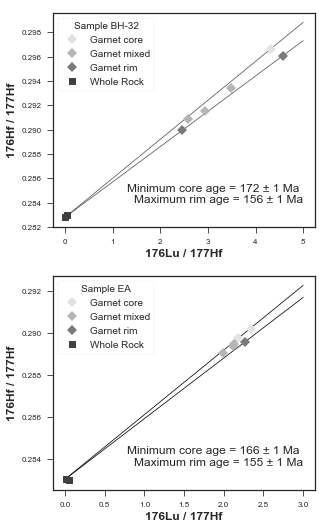

In [4]:
# Import the Lu-Hf data
df = pd.read_csv('../data/luhf-data.csv')

# Subset by sample
rm7 = df[df.Sample == 'EA']
bh32 = df[df.Sample == 'BH32']

# Groupby mineral seperate
rm7_sep = rm7.groupby('Mineral')
bh32_sep = bh32.groupby('Mineral')

# Set plotting style with Seaborn
sns.set_palette('Greys', n_colors=4)

# Set the marker order
markers = ['D', 'D', 'D', 's']

# Size the figure ~1-column wide on 3-column layout
fig = plt.figure(figsize=(4.66, 2*4.66/1.25)); 

# 2 by 1 plotting grid
# SAMPLE EA
# -----
plt.subplot(212)

# Add 5% padding to the autoscaling
plt.margins(0.05) 

# Plot the best fit lines from isoplot
xn = np.arange(0,4)
mx_line = 0.2830305 + xn*0.00308147
mn_line = 0.2830315 + xn*0.00289017
plt.plot(xn, mx_line, linewidth=0.75, linestyle='-', color='black')
plt.plot(xn, mn_line, linewidth=0.75, linestyle='-', color='black')

# Plot mineral separates and color by group
for (name, group), marker in zip(rm7_sep, cycle(markers)):
    plt.plot(group.LuHf, group.HfHf,
             marker=marker, linestyle='', ms=7, label=name)

# Label the plot axes
plt.xlabel('176Lu / 177Hf', fontweight = 'extra bold', fontsize=12)    
plt.ylabel('176Hf / 177Hf', fontweight = 'extra bold', fontsize=12)    

# Add the plot legend
plt.legend(frameon=True,fancybox=True, loc=2, title='Sample EA')
l = plt.legend(frameon=True,fancybox=True, loc=2, title='Sample EA',prop={'size':10})
t = l.get_title()  #get the text object containing the title
t.set_fontsize(10)  #set the font size

# Add results to the plot
plt.text(3, 0.2837, 'Minimum core age = 166 ± 1 Ma \nMaximum rim age = 155 ± 1 Ma', 
          horizontalalignment='right', fontsize=12)


# SAMPLE BH-32
# -----
plt.subplot(211)

# Add 5% padding to the autoscaling
plt.margins(0.05) 

# Plot the best fit lines from isoplot
xi = np.arange(0.,6.)
max_line = 0.2827739 + xi*0.003207776
min_line = 0.2827766 + xi*0.002906399
plt.plot(xi, max_line, linewidth=0.75, linestyle='-', color='#525252')
plt.plot(xi, min_line, linewidth=0.75, linestyle='-', color='#525252')

# Plot and color by group
for (name, group), marker in zip(bh32_sep, cycle(markers)):
    plt.plot(group.LuHf, group.HfHf,
             marker=marker, linestyle='', ms=7, label=name)
# Label the plot axes    
plt.xlabel('176Lu / 177Hf', fontweight = 'extra bold', fontsize=12)    
plt.ylabel('176Hf / 177Hf', fontweight = 'extra bold', fontsize=12)    

# Add the plot legend
plt.legend(frameon=True,fancybox=True, loc=2, title='Sample BH-32')
l = plt.legend(frameon=True,fancybox=True, loc=2, title='Sample BH-32', prop={'size':10})
t = l.get_title()  #get the text object containing the title
t.set_fontsize(10)  #set the font size

# Add results to the plot
plt.text(5, 0.284, 'Minimum core age = 172 ± 1 Ma \nMaximum rim age = 156 ± 1 Ma', 
         horizontalalignment='right', fontsize=12)

fig.tight_layout()
plt.savefig('../figs/manuscript-garnet-ages.png', dpi=300)

## Zircon weighted average ages

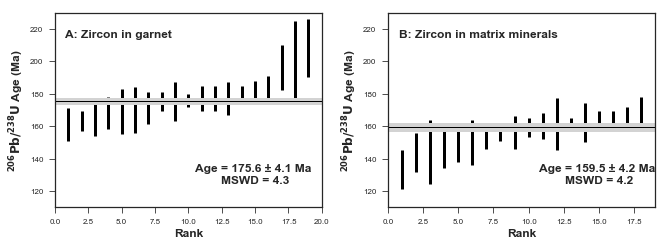

In [3]:
# Import U-Pb data
upb = pd.read_csv('../data/zircon-ages.csv')
upb = upb[upb.Age_Status == 'Include']

# Subset U-Pb data by zircon population
zm = upb[upb.Population == 'Matrix']
zg = upb[upb.Population == 'Garnet']

# Sort by age and reindex
zm = zm.sort_values('Age')
zm.index = range(1, len(zm) + 1)
zg = zg.sort_values('Age')
zg.index = range(1, len(zg) + 1)

# Size figure for manuscript
fig = plt.figure(figsize=(2*4.69, 4.69/1.33))

# U-Pb weighted average for zircon in Garnet
# -----
plt.subplot(121)

# Add 5% padding to the autoscaling
plt.margins(0.05) 

# Plot mean and 2sigma CI from isoplot
xi = np.arange(0,25)
zg_mean = 175.6 + xi*0.
zg_max = (175.6+2.4) + xi*0.
zg_min = (175.6-2.4) + xi*0.

plt.plot(xi, zg_mean, linewidth=7, linestyle='-', color='lightgrey')
plt.plot(xi, zg_mean, linewidth=1, linestyle='-', color='black')

# Plot ages
plt.errorbar(zg.index, zg.Age, yerr=zg.Error*2., elinewidth=3, marker='', linestyle='', color='k')

# Label Axes
plt.ylim(110, 230)
plt.xlim(0, 20)
plt.ylabel('$\mathbf{^{206}Pb/^{238}U}$ Age (Ma)', fontweight = 'extra bold', fontsize=12)
plt.xlabel('Rank', fontweight = 'extra bold', fontsize=12)

# Add results to the plot
plt.text(0.75, 215, u'A: Zircon in garnet', fontweight = 'extra bold', fontsize=12)

plt.text(15, 125, u'Age = 175.6 ± 4.1 Ma \nMSWD = 4.3', 
         fontweight = 'extra bold', horizontalalignment='center', fontsize=12)


# U-Pb weighted average for zircon in the matrix
# -----
plt.subplot(122)

# Add 5% padding to the autoscaling
plt.margins(0.05) 

# Plot mean and 2sigma CI from isoplot
xn = np.arange(0,25)
zm_mean = 159.5 + xn*0.
zm_max = (159.5+2.8) + xn*0.
zm_min = (159.5-2.8) + xn*0.
plt.plot(xn, zm_mean, linewidth=9, linestyle='-', color='lightgrey')
plt.plot(xn, zm_mean, linewidth=1, linestyle='-', color='black')
#plt.plot(xn, zm_max, linewidth=1, linestyle='--', color='black')
#plt.plot(xn, zm_min, linewidth=1, linestyle='--', color='black')

# Plot ages
plt.errorbar(zm.index, zm.Age, yerr=zm.Error*2., elinewidth=3, marker='', linestyle='', color='k')

# Label Axes
plt.ylim(110, 230)
plt.xlim(0, 20)
plt.ylabel('$\mathbf{^{206}Pb/^{238}U}$ Age (Ma)', fontweight = 'extra bold', fontsize=12)
plt.xlabel('Rank', fontweight = 'extra bold', fontsize=12)

# Add results to the plot
plt.text(0.75, 215, u'B: Zircon in matrix minerals', fontweight = 'extra bold', fontsize=12)
plt.text(15, 125, u'Age = 159.5 ± 4.2 Ma \nMSWD = 4.2', 
         fontweight = 'extra bold', horizontalalignment='center', fontsize=12)

fig.tight_layout()
plt.savefig('../figs/manuscript-zircon-averages.png')

## Zircon trace element chemistry

/Users/sean/miniconda3/lib/python3.6/site-packages/matplotlib/scale.py:111: RuntimeWarning: invalid value encountered in less_equal
  out[a <= 0] = -1000


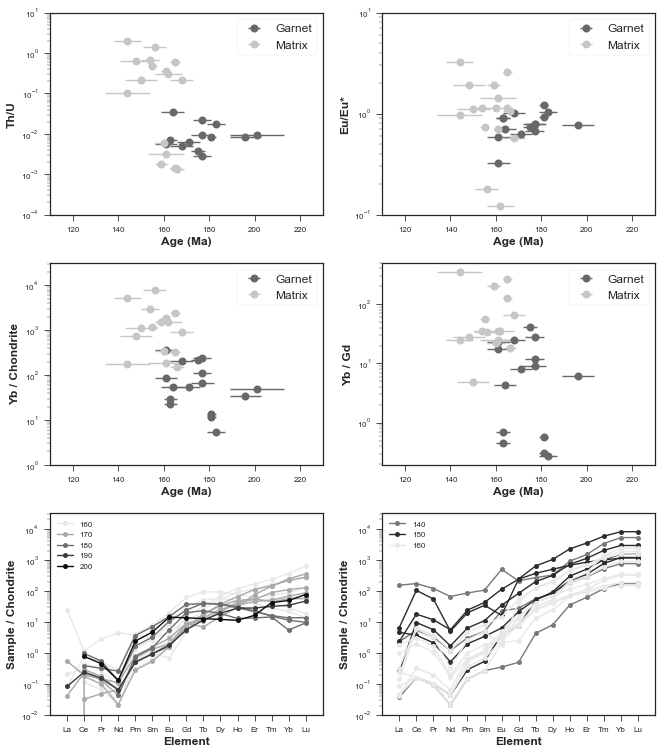

In [2]:
# Import the REE data
df = pd.read_csv('../data/zircon-ree.csv', index_col='Spot')
df['ThU'] = df.Th/df.U

# Chondrite values from McDonough and Sun, 1995
ms95 = {'La':0.237, 'Ce':0.613, 'Pr': 0.0928, 'Nd':0.457, 'Pm': 0.260, 'Sm':0.148, 'Eu':0.0563, 'Gd':0.199, 
        'Tb':0.0361, 'Dy':0.246, 'Ho':0.0546,'Er': 0.16, 'Tm':0.0247,'Yb':0.161, 'Lu':0.0246}

# Convert to pandas Series object
ms95 = pd.Series(ms95)

# Normalize data by chondrite values
cols = ['La', 'Ce', 'Pr', 'Nd', 'Pm', 'Sm', 'Eu', 'Gd', 'Tb', 'Dy', 'Ho','Er', 'Tm','Yb', 'Lu']
ree = df[cols]
ree = ree.div(ms95, axis=1)
ree = ree[cols]

# Append normalized values to dataset
df_norm =ree.join(df[['ThU','Occurrence', 'Age_Status', 'Ree_Status', 'Age', 'Error', 'AgeGroup']])
df_norm['EuS'] = df_norm.Eu/np.sqrt(df_norm.Sm * df_norm.Gd)


# Exclude analyses without REE data or with rejected ages
df_ex = df_norm[(df_norm.Ree_Status=='Include') & (df_norm.Age_Status == 'Include')]

# Subset zircon inlcuded within garnet
df_grt = df_ex[df_ex['Occurrence']=='Garnet']
df_grt = df_grt.sort_index()

# Subset zircon included within matrix assemblages
df_mtx = df_ex[df_ex['Occurrence']=='Matrix']
df_mtx = df_mtx.sort_index()

# Set figure size and palette
fig = plt.figure(figsize=(2*4.69, 3*4.69/1.33))
sns.set_palette('Greys_r', n_colors=2)

# Normalized REE diagram for all grains, shaded by age
# -----
plt.subplot(321)

# Add 5% padding to the autoscaling
#plt.margins(0.05) 
grp1 = df_ex[np.isfinite(df_ex.ThU)].groupby('Occurrence')

for name, group in grp1:
    plt.errorbar(x=group.Age, xerr=group.Error , y=group.ThU, linestyle='', marker='o', ms=8, label=name)
    
plt.xlabel('Age (Ma)', fontweight = 'extra bold', fontsize=12)
plt.ylabel('Th/U', fontweight = 'extra bold', fontsize=12)
plt.xlim(110, 230)
plt.ylim(10**-4, 10**1)
plt.yscale('log')
plt.legend(frameon=True,fancybox=True, loc=1, prop={'size':12})

# Normalized Eu vs age for zircon in garnet and matrix
# -----
plt.subplot(322)

# Add 5% padding to the autoscaling
#plt.margins(0.05) 

# Plot by zircon population
#grp2 = df0[np.isfinite(df0.Eu)].groupby('Occurrence')
#for name, group in grp2:
#    plt.errorbar(x=group.Age, xerr=group.Error, y=group.Eu, marker='o', linestyle='', ms=8, label=name)

grp2 = df_ex[np.isfinite(df_ex.EuS)].groupby('Occurrence')

for name, group in grp2:
    plt.errorbar(x=group.Age, xerr=group.Error, y=group.EuS, marker='o', linestyle='', ms=8, label=name)
    
# Set axis limits and labels
plt.xlabel('Age (Ma)', fontweight = 'extra bold', fontsize=12)
plt.ylabel('Eu/Eu*', fontweight = 'extra bold', fontsize=12)
plt.yscale('log')
plt.ylim(10**-1.0, 10**1.0)
plt.xlim(110, 230)
plt.legend(frameon=True,fancybox=True, loc=1, prop={'size':12})

# Normalized Yb vs age for zircon in garnet and matrix
# -----
plt.subplot(323)

# Add 5% padding to the autoscaling
#plt.margins(0.05) 

# Plot by zircon population
grp3 = df_ex[np.isfinite(df_ex.Yb)].groupby('Occurrence')

for name, group in grp3:
    plt.errorbar(x=group.Age, xerr=group.Error, y=group.Yb, marker='o', linestyle='', ms=8, label=name)

# Set axis limits and labels
plt.xlabel('Age (Ma)', fontweight = 'extra bold', fontsize=12)
plt.ylabel('Yb / Chondrite', fontweight = 'extra bold', fontsize=12)
plt.yscale('log')
plt.ylim(10**0, 10**4.5)
plt.xlim(110, 230)
plt.legend(frameon=True,fancybox=True, loc=1, prop={'size':12})


# Normalized Dy vs age for zircon in garnet and matrix
# -----
plt.subplot(324)

# Add 5% padding to the autoscaling
plt.margins(0.05) 

# Plot by zircon population
grp4 = df_ex[np.isfinite(df_ex.Dy)].groupby('Occurrence')

for name, group in grp4:
    plt.errorbar(x=group.Age, xerr=group.Error, y=(group.Yb/group.Gd), marker='o', linestyle='', ms=8, label=name)

# Set axis limits and labels
plt.xlabel('Age (Ma)', fontweight = 'extra bold', fontsize=12)
plt.ylabel('Yb / Gd', fontweight = 'extra bold', fontsize=12)
plt.yscale('log')
#plt.ylim(10**0.5, 10**3.5)
plt.xlim(110, 230)
plt.legend(frameon=True,fancybox=True, loc=1, prop={'size':12})

# REE diagram for zircon in garnet
# -----
plt.subplot(325)

# Interpolate NA values for conitinuous line
gp = df_grt.groupby('AgeGroup')
for name, group in gp:
    glr = str((name**1.5)/255.)
    grt = group[cols].T
    grt = grt.interpolate(method='linear')
    xg = np.arange(1,16)
    plt.plot(xg, grt, marker='o', ms = 5, c=glr, label=name)

# Axis labels, limits, and log y-scale
plt.ylabel('Sample / Chondrite', fontweight = 'extra bold', fontsize=12)
plt.xlabel('Element', fontweight = 'extra bold', fontsize=12)
plt.xlim(0, 16);
plt.ylim(10**-2, 10**4.5);
plt.semilogy()
plt.xticks(xg, cols);
plt.legend() 


#  REE diagram for zircon in the matrix
# -----
plt.subplot(326)

# Interpolate NA values for conitinuous line
gp = df_mtx.groupby('AgeGroup')
for name, group in gp:
    glr = str((name**1.5)/255.)
    grt = group[cols].T
    grt = grt.interpolate(method='linear')
    xg = np.arange(1,16)
    plt.plot(xg, grt, marker='o', ms = 5, c=glr, label=name)

# Axis labels, limits, and log y-scale
plt.ylabel('Sample / Chondrite', fontweight = 'extra bold', fontsize=12)
plt.xlabel('Element', fontweight = 'extra bold', fontsize=12)
plt.xlim(0, 16);
plt.ylim(10**-2, 10**4.5);
plt.semilogy()
plt.xticks(xg, cols);
plt.legend()

# Save the figure
fig.tight_layout()

plt.savefig('../figs/manuscript-zircon-chemistry.png', dpi=300)


## Franciscan and Coast Range Ophiolite ranked age plots

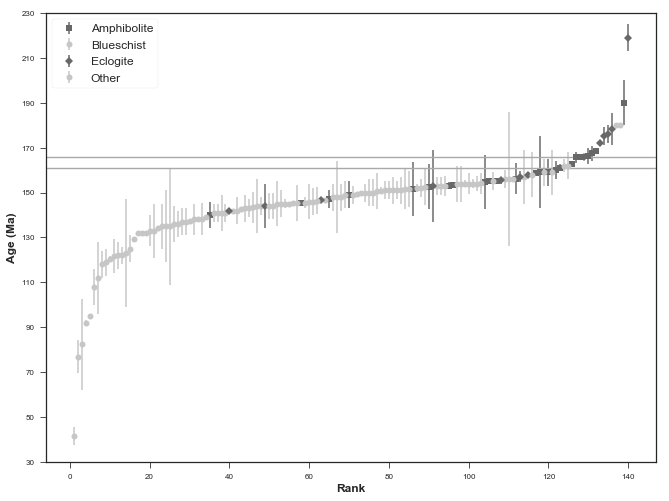

In [9]:
# Read the raw data from .csv file
# Francsican Rocks
frn = pd.read_csv('../data/franciscan-mineral-ages.csv')

# Coast Range Ophiolite
cro = pd.read_csv('../data/cro-ages.csv')

# Map rocktype names for each dataset
FscRockMap = {'bs':'Blueschist', 'gb':'Other', 'mm':'Other', 'amph':'Amphibolite', 'ms':'Other', 'eclogite':'Eclogite', 'mv':'Other'}
CroRockMap = {'d':'undifferentiated', 'p':'undifferentiated', 'pg':'undifferentiated', 'v':'undifferentiated', 
              'u':'undifferentiated', 'pgs':'plagiogranite', 'glass':'glass'}

frn['Rock'] = frn['Rock'].map(FscRockMap)
cro['Rock'] = cro['Rock'].map(CroRockMap)

# Create a new DataFrames sorted by Age
# Francsican Rocks
fr = frn.sort_values('Age')
fr.index = range(1, len(fr) + 1)

# Coast Range Ophiolite
cr = cro.sort_values('Age')
cr.index = range(1, len(cr) + 1)

# Group data by rock type
# Francsican Rocks
fr_rocktype = fr.groupby('Rock')

# Coast Range Ophiolite
cr_rocktype = cr.groupby('Rock')

# Size figure
fig = plt.figure(figsize=(2*4.69, 2*4.69/1.33));

# Add 5% padding to the autoscaling
#plt.margins(0.05) 
markers = ['s', 'o', 'D', 'o'];

# Plot and color by group
for (name, group), marker in zip(fr_rocktype, cycle(markers)):
    plt.errorbar(group.index, group.Age, 
                yerr=group.Error, elinewidth=1.5,
                marker=marker, linestyle='', ms=6, label=name);


# Plot labels, legend, and axis limits
#plt.xlim(-2, 140)
plt.ylim(30, 230)
plt.xlabel('Rank', fontweight = 'extra bold',fontsize=12)    
plt.ylabel('Age (Ma)', fontweight = 'extra bold',fontsize=12)    
plt.legend(frameon=True,fancybox=True, loc=2, prop={'size':12});

# Add the age of the CRO
plt.axhline(166, linestyle='-', color='darkgrey')
plt.axhline(161, linestyle='-', color='darkgrey')
plt.yticks(np.arange(30, 230+1, 20.0));

# Save the figure
fig.tight_layout()

plt.savefig('../figs/manuscript-franciscan-ages.png', dpi=300)